In [1]:
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD, Adagrad, RMSprop, Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from keras import regularizers
from keras.models import Sequential
from keras.layers import Embedding
from keras.optimizers import SGD, Adagrad, RMSprop, Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
stop_words = set(stopwords.words("english"))

def preprocess(text):
    # Remove @username
    text = re.sub(r'@\w+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-z0-9\s]', '', text)
    # Tokenize the words
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
    # Join the words
    text = ' '.join(lemmatized_words)
    return text




data = pd.read_csv("Tweets.csv")
df = data[["text","airline_sentiment"]]
df = df[df.airline_sentiment != "neutral"]
df['text'] = df['text'].apply(preprocess)



max_features = 4000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['text'].values)

X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)
Y = np.array(df['airline_sentiment'] == "positive", dtype=int)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)



In [10]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers

In [11]:
def build_classifier(optimizer):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(max_features, 128, input_length=X_train.shape[1]))
    model.add(tf.keras.layers.SpatialDropout1D(0.5))
    model.add(tf.keras.layers.LSTM(196, dropout = 0.3, recurrent_dropout = 0.3 ))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax,kernel_regularizer=regularizers.L1(0.01)))

    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [12]:
model = KerasClassifier(build_fn=build_classifier)

parameters = {'batch_size': [16,32],
              'epochs': [8,10],
              'optimizer': ['adam','rmsprop']}


C:\Users\prana\AppData\Local\Temp\ipykernel_6252\3254356261.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_classifier)


In [13]:


grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)

In [14]:


grid_search = grid_search.fit(X_train, Y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_



Epoch 1/8
404/404 [==============================] - 19s 43ms/step - loss: 0.4539 - accuracy: 0.8497
Epoch 2/8
404/404 [==============================] - 17s 43ms/step - loss: 0.2398 - accuracy: 0.9242
Epoch 3/8
404/404 [==============================] - 17s 43ms/step - loss: 0.1864 - accuracy: 0.9434
Epoch 4/8
404/404 [==============================] - 17s 43ms/step - loss: 0.1490 - accuracy: 0.9530
Epoch 5/8
404/404 [==============================] - 17s 43ms/step - loss: 0.1267 - accuracy: 0.9630
Epoch 6/8
404/404 [==============================] - 17s 42ms/step - loss: 0.1055 - accuracy: 0.9681
Epoch 7/8
404/404 [==============================] - 17s 43ms/step - loss: 0.0988 - accuracy: 0.9698
Epoch 8/8
51/51 [==============================] - 1s 9ms/step
Epoch 1/8
404/404 [==============================] - 18s 43ms/step - loss: 0.4545 - accuracy: 0.8538
Epoch 2/8
404/404 [==============================] - 17s 43ms/step - loss: 0.2400 - accuracy: 0.9197
Epoch 3/8
404/404 [=========

404/404 [==============================] - 17s 43ms/step - loss: 0.2669 - accuracy: 0.9070
Epoch 4/10
404/404 [==============================] - 17s 43ms/step - loss: 0.2465 - accuracy: 0.9126
Epoch 5/10
404/404 [==============================] - 17s 43ms/step - loss: 0.2321 - accuracy: 0.9192
Epoch 6/10
404/404 [==============================] - 17s 43ms/step - loss: 0.2221 - accuracy: 0.9259
Epoch 7/10
404/404 [==============================] - 17s 43ms/step - loss: 0.2106 - accuracy: 0.9246
Epoch 8/10
404/404 [==============================] - 17s 43ms/step - loss: 0.2056 - accuracy: 0.9290
Epoch 9/10
404/404 [==============================] - 17s 43ms/step - loss: 0.1977 - accuracy: 0.9282
Epoch 10/10
51/51 [==============================] - 1s 9ms/step
Epoch 1/10
404/404 [==============================] - 18s 43ms/step - loss: 0.4734 - accuracy: 0.8428
Epoch 2/10
404/404 [==============================] - 17s 43ms/step - loss: 0.3071 - accuracy: 0.8954
Epoch 3/10
404/404 [========

202/202 [==============================] - 18s 91ms/step - loss: 0.1273 - accuracy: 0.9635
Epoch 6/10
202/202 [==============================] - 18s 91ms/step - loss: 0.1133 - accuracy: 0.9678
Epoch 7/10
202/202 [==============================] - 18s 91ms/step - loss: 0.0963 - accuracy: 0.9745
Epoch 8/10
202/202 [==============================] - 19s 92ms/step - loss: 0.0805 - accuracy: 0.9800
Epoch 9/10
202/202 [==============================] - 19s 92ms/step - loss: 0.0785 - accuracy: 0.9785
Epoch 10/10
51/51 [==============================] - 1s 22ms/step
Epoch 1/10
202/202 [==============================] - 20s 91ms/step - loss: 0.5202 - accuracy: 0.8400
Epoch 2/10
202/202 [==============================] - 18s 90ms/step - loss: 0.3158 - accuracy: 0.8971
Epoch 3/10
202/202 [==============================] - 18s 90ms/step - loss: 0.2583 - accuracy: 0.9175
Epoch 4/10
202/202 [==============================] - 18s 90ms/step - loss: 0.2334 - accuracy: 0.9203
Epoch 5/10
202/202 [=======

In [15]:
print("Best parameters: ", best_parameters)
print("Best accuracy: ", best_accuracy)


Best parameters:  {'batch_size': 32, 'epochs': 10, 'optimizer': 'rmsprop'}
Best accuracy:  0.9083916255402631


# Ensemble Technique to Handle Imbalance dataset problem:

In [3]:
# function to average the predictions of individual models
def ensemble_predict(models, X):
    predictions = [model.predict(X) for model in models]
    avg_prediction = np.average(predictions, axis=0)
    return avg_prediction

# create a list to store the individual models
models = []

# number of models to train
num_models = 5

for i in range(num_models):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(max_features, 128, input_length=X_train.shape[1]),
        tf.keras.layers.SpatialDropout1D(0.5),
        tf.keras.layers.LSTM(196, dropout=0.3, recurrent_dropout=0.3),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(100, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(2, activation=tf.nn.softmax,kernel_regularizer=regularizers.L1(0.01))
    ])
    model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.3, verbose=2)
    models.append(model)


Epoch 1/10
177/177 - 18s - loss: 0.5239 - accuracy: 0.8412 - val_loss: 0.3992 - val_accuracy: 0.8791 - 18s/epoch - 99ms/step
Epoch 2/10
177/177 - 16s - loss: 0.3156 - accuracy: 0.9015 - val_loss: 0.3188 - val_accuracy: 0.8882 - 16s/epoch - 90ms/step
Epoch 3/10
177/177 - 15s - loss: 0.2562 - accuracy: 0.9174 - val_loss: 0.2934 - val_accuracy: 0.8899 - 15s/epoch - 87ms/step
Epoch 4/10
177/177 - 15s - loss: 0.2289 - accuracy: 0.9232 - val_loss: 0.2925 - val_accuracy: 0.8927 - 15s/epoch - 87ms/step
Epoch 5/10
177/177 - 16s - loss: 0.2153 - accuracy: 0.9252 - val_loss: 0.3012 - val_accuracy: 0.8932 - 16s/epoch - 93ms/step
Epoch 6/10
177/177 - 16s - loss: 0.1961 - accuracy: 0.9323 - val_loss: 0.3055 - val_accuracy: 0.8960 - 16s/epoch - 88ms/step
Epoch 7/10
177/177 - 16s - loss: 0.1848 - accuracy: 0.9339 - val_loss: 0.2767 - val_accuracy: 0.8956 - 16s/epoch - 89ms/step
Epoch 8/10
177/177 - 16s - loss: 0.1730 - accuracy: 0.9406 - val_loss: 0.3024 - val_accuracy: 0.8993 - 16s/epoch - 89ms/step


In [4]:
batch_size = 32
ensemble_inputs = models[0].input
input_shape = models[0].input_shape[1:]
X = np.zeros((batch_size,) + input_shape)
ensemble_outputs = [model(ensemble_inputs) for model in models]
average_outputs = tf.reduce_mean(ensemble_outputs, axis=0)
average_outputs = tf.keras.layers.Lambda(lambda x: x)(average_outputs)
ensemble_model = tf.keras.models.Model(inputs=ensemble_inputs, outputs=average_outputs)

In [5]:
ensemble_model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [7]:
history = ensemble_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.3, verbose=2)

Epoch 1/10
177/177 - 90s - loss: 0.1777 - accuracy: 0.9499 - val_loss: 0.3316 - val_accuracy: 0.9002 - 90s/epoch - 506ms/step
Epoch 2/10
177/177 - 78s - loss: 0.1676 - accuracy: 0.9519 - val_loss: 0.3533 - val_accuracy: 0.8969 - 78s/epoch - 438ms/step
Epoch 3/10
177/177 - 78s - loss: 0.1602 - accuracy: 0.9549 - val_loss: 0.3339 - val_accuracy: 0.9018 - 78s/epoch - 438ms/step
Epoch 4/10
177/177 - 77s - loss: 0.1551 - accuracy: 0.9568 - val_loss: 0.3248 - val_accuracy: 0.9010 - 77s/epoch - 438ms/step
Epoch 5/10
177/177 - 77s - loss: 0.1473 - accuracy: 0.9574 - val_loss: 0.3358 - val_accuracy: 0.8965 - 77s/epoch - 438ms/step
Epoch 6/10
177/177 - 77s - loss: 0.1460 - accuracy: 0.9579 - val_loss: 0.3329 - val_accuracy: 0.8973 - 77s/epoch - 437ms/step
Epoch 7/10
177/177 - 77s - loss: 0.1415 - accuracy: 0.9577 - val_loss: 0.3578 - val_accuracy: 0.8948 - 77s/epoch - 437ms/step
Epoch 8/10
177/177 - 77s - loss: 0.1336 - accuracy: 0.9620 - val_loss: 0.3545 - val_accuracy: 0.8940 - 77s/epoch - 437

In [8]:

# evaluate the ensemble model
ensemble_model.evaluate(X_test, Y_test)


109/109 [==============================] - 10s 95ms/step - loss: 0.3251 - accuracy: 0.9113


[0.32512471079826355, 0.9113485217094421]

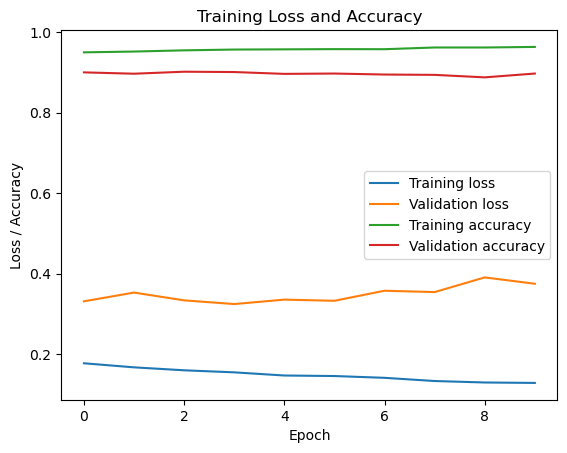

In [9]:
import matplotlib.pyplot as plt

# Plotting loss vs accuracy
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.title('Training Loss and Accuracy')
plt.show()

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve,auc

In [11]:
Y_pred = ensemble_model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

precision = precision_score(Y_test, Y_pred_classes)
recall = recall_score(Y_test, Y_pred_classes)
f1 = f1_score(Y_test, Y_pred_classes)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)


109/109 [==============================] - 11s 93ms/step
Precision: 0.7842261904761905
Recall: 0.7648766328011611
F1-Score: 0.7744305657604703
AUC: 0.9445886172974636


# Update for Cost-Sensitive Learning

In [12]:
def get_weights(Y):
    class_weights = np.zeros(2)
    for i in range(2):
        class_weights[i] = 1.0 / (sum(Y == i)/len(Y))
    return class_weights

class_weights = get_weights(Y_train)
print("Class Weights: ", class_weights)

ensemble_model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"],
sample_weight_mode="temporary", weighted_metrics=["accuracy"], loss_weights=class_weights[1])




ensemble_model.fit(X_train, Y_train, epochs=12, batch_size=64, validation_split=0.4, verbose=2)


Class Weights:  [1.26139913 4.8255675 ]
Epoch 1/12
76/76 - 60s - loss: 0.5260 - accuracy: 0.9629 - weighted_accuracy: 0.9629 - val_loss: 1.3635 - val_accuracy: 0.9112 - val_weighted_accuracy: 0.9112 - 60s/epoch - 785ms/step
Epoch 2/12
76/76 - 42s - loss: 0.4780 - accuracy: 0.9672 - weighted_accuracy: 0.9672 - val_loss: 1.3212 - val_accuracy: 0.9127 - val_weighted_accuracy: 0.9127 - 42s/epoch - 557ms/step
Epoch 3/12
76/76 - 42s - loss: 0.4880 - accuracy: 0.9693 - weighted_accuracy: 0.9693 - val_loss: 1.2754 - val_accuracy: 0.9097 - val_weighted_accuracy: 0.9097 - 42s/epoch - 557ms/step
Epoch 4/12
76/76 - 42s - loss: 0.4470 - accuracy: 0.9707 - weighted_accuracy: 0.9707 - val_loss: 1.5254 - val_accuracy: 0.9158 - val_weighted_accuracy: 0.9158 - 42s/epoch - 557ms/step
Epoch 5/12
76/76 - 42s - loss: 0.4349 - accuracy: 0.9728 - weighted_accuracy: 0.9728 - val_loss: 1.6959 - val_accuracy: 0.9016 - val_weighted_accuracy: 0.9016 - 42s/epoch - 558ms/step
Epoch 6/12
76/76 - 42s - loss: 0.4186 - 

In [13]:
score = ensemble_model.evaluate(X_test, Y_test, verbose=False)
print("loss = ", score[0])
print("accuracy = ", score[1])

loss =  1.780985951423645
accuracy =  0.9113485217094421


In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve,auc

In [15]:
Y_pred = ensemble_model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

precision = precision_score(Y_test, Y_pred_classes)
recall = recall_score(Y_test, Y_pred_classes)
f1 = f1_score(Y_test, Y_pred_classes)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)


109/109 [==============================] - 11s 94ms/step
Precision: 0.7876506024096386
Recall: 0.7590711175616836
F1-Score: 0.7730968218773095
AUC: 0.9410593181763482
